# Digit Classification
## Importing important libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Loading datasets
#### these datasets are are loaded from keras module of dataset

In [5]:
(xtrain,ytrain),(xtest,ytest)=l=keras.datasets.mnist.load_data()

In [6]:
# shape of a single dataset
xtrain[0].shape

(28, 28)

### Normalizing the dataset

In [7]:
X1=xtrain/255
X2=xtest/255

In [8]:
# image of a single dataset
X1=X1.reshape(-1,28,28,1)
X2=X2.reshape(-1,28,28,1)

In [14]:
X1.shape

(60000, 28, 28, 1)

## Modelling the Neural Network with keras
#### In this we first use 3 layered neural network-
###### 1)layer 1- this function ("keras.layers.Fallten()") changes the give 2D dataset in 1D dataset or we cay say flattens the input.
###### 2)layer 2- in this layer we have 25 units of neuron on which data trains
###### layer 3- in this layer we use 10 neurons to have sparse categorical output(i.e output between(0-9) in the the give 10   
######   neurons where the neuron having the largest is considered as answer)


In [26]:
model=keras.Sequential([
    
    keras.layers.Conv2D(80,(6,6),activation='relu',input_shape=(28,28,1),name="1"),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Conv2D(90,(4,4),activation='relu',name="2"),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Conv2D(100,(3,3),activation='relu',name="3"),
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512,activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    
                              ])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1 (Conv2D)                   (None, 23, 23, 80)        2960      
_________________________________________________________________
average_pooling2d_6 (Average (None, 11, 11, 80)        0         
_________________________________________________________________
2 (Conv2D)                   (None, 8, 8, 90)          115290    
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 90)          0         
_________________________________________________________________
3 (Conv2D)                   (None, 2, 2, 100)         81100     
_________________________________________________________________
average_pooling2d_8 (Average (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 100)              

In [27]:
# here we use adam optimizer with default learning rate as it works expectedly
#and use 'sparse_categorical_croosentropy' as explained
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
#training the model with 20 epochs 
model.fit(X1,ytrain,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0453 - acc: 0.9868
Epoch 2/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0378 - acc: 0.9884
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0325 - acc: 0.9904
Epoch 4/10
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0294 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0259 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0237 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0205 - acc: 0.9937
Epoch 8/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0181 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0169 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 105s 2ms/sample

In [30]:
#predicting the model
y_p=model.predict(X2)
y_p

array([[0.0000000e+00, 1.1891127e-05, 1.1652708e-05, ..., 9.9874711e-01,
        5.9604645e-08, 5.4240227e-06],
       [3.8236380e-05, 2.8908253e-06, 9.9398416e-01, ..., 1.2099743e-05,
        8.1062317e-06, 2.6822090e-07],
       [0.0000000e+00, 9.9914289e-01, 1.5497208e-06, ..., 1.0654330e-04,
        1.2040138e-05, 5.0663948e-07],
       ...,
       [2.9802322e-08, 2.3365021e-05, 8.3446503e-07, ..., 4.5895576e-06,
        1.6093254e-06, 2.1815300e-05],
       [6.5565109e-07, 3.5762787e-07, 2.9802322e-08, ..., 8.9406967e-08,
        9.5784664e-05, 5.7518482e-06],
       [1.0579824e-05, 4.3511391e-06, 5.0663948e-07, ..., 0.0000000e+00,
        4.3809414e-06, 1.7881393e-07]], dtype=float32)

### Converting the model output into an understandable manner

In [31]:
#looping to take max value from each single output
yp=[np.argmax(y_p[i]) for i in range(0,len(y_p))]
yp=np.array(yp,dtype='int')


In [32]:
print(ytest)
print(yp)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


### Accuracy and loss on test set

In [33]:
k=0
for i in range(0,1000):
    if(ytest[i]!=yp[i]):
        k+=1
print("loss on test set:",k/1000)
print("Accuracy on test set",1-(k/1000))

loss on test set: 0.016
Accuracy on test set 0.984


### Taking any random input

Predicting value of 666th(randomly taken) dataset : 7

Image of 666th data set:


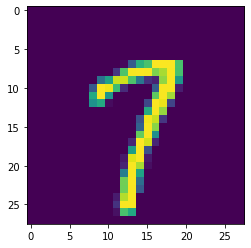

In [35]:
print("Predicting value of 666th(randomly taken) dataset :",ytest[666])
print("\nImage of 666th data set:")

plt.imshow(X2[666].reshape(28,28))